# Tutorial 2: Intermediate level
Using esinet to predict single time-frame sources of a sample ERP data set. 

This tutorial is based on an [mne-python tutorial](https://mne.tools/stable/auto_tutorials/inverse/30_mne_dspm_loreta.html)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import mne
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import sys; sys.path.insert(0, '../../esinet')
from esinet import util
from esinet import Simulation
from esinet import Net
import os
sys.path.insert(0, "../")
from laura import *

subjects_dir = mne.datasets.sample.data_path() + '\\subjects'
plot_params = dict(surface='white', hemi='both', verbose=0, subjects_dir=subjects_dir)
mne.set_config('SUBJECTS_DIR', subjects_dir)

# Load the data
Just as in the [mne-python tutorial](https://mne.tools/stable/auto_tutorials/inverse/30_mne_dspm_loreta.html) we have to load some sample data first

Computing rank from data with rank=None
    Using tolerance 2.9e-09 (2.2e-16 eps * 305 dim * 4.2e+04  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Created an SSP operator (subspace dimension = 3)
    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 305 -> 302
Estimating covariance using SHRUNK
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
Number of samples used : 1736
log-likelihood on unseen data (descending order):
   shrunk: -1508.424
   empirical: -1712.197
selecting best estimator: shrunk
[done]
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


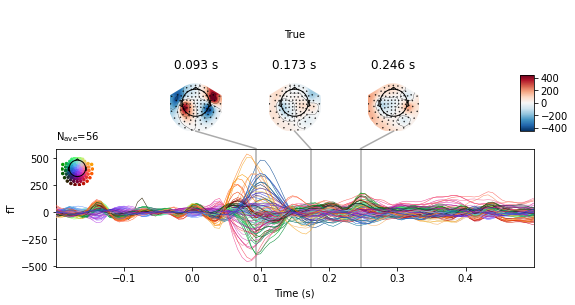

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


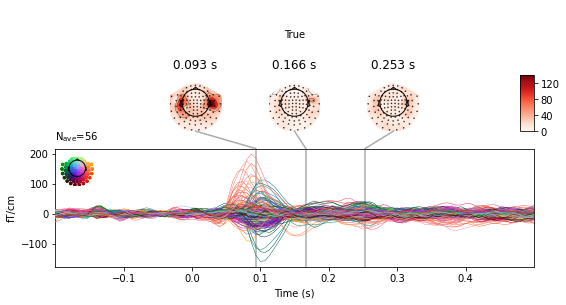

[<Figure size 576x302.4 with 7 Axes>, <Figure size 576x302.4 with 7 Axes>]

In [9]:
data_path = mne.datasets.sample.data_path()
raw_fname = os.path.join(data_path, 'MEG', 'sample',  
                    'sample_audvis_filt-0-40_raw.fif')

raw = mne.io.read_raw_fif(raw_fname, verbose=0)  # already has an average reference
events = mne.find_events(raw, stim_channel='STI 014', verbose=0)

event_id = dict(aud_l=1)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)
# raw.info['bads'] = ['MEG 2443', 'EEG 053']  # no bad channels with EEG
baseline = (None, 0)  # means from the first instant to t = 0
reject = dict(grad=4000e-13, eog=150e-6)  # , mag=4e-12

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=('meg', 'eog'), baseline=baseline, reject=reject,  # grad instead of meg
                    verbose=0)

fname_fwd = data_path + '/MEG/sample/sample_audvis-meg-oct-6-fwd.fif' 
fwd = mne.read_forward_solution(fname_fwd, verbose=0)
fwd = mne.convert_forward_solution(fwd, surf_ori=True, force_fixed=True,
                                                    use_cps=True, verbose=0)
noise_cov = mne.compute_covariance(
    epochs, tmax=0., method=['shrunk', 'empirical'], rank=None, verbose=True)
evoked = epochs.average()
evoked.plot_joint(title='True')

In [3]:
from esinet.forward import create_forward_model
fwd_small = create_forward_model(info=evoked.info, sampling='ico3')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(

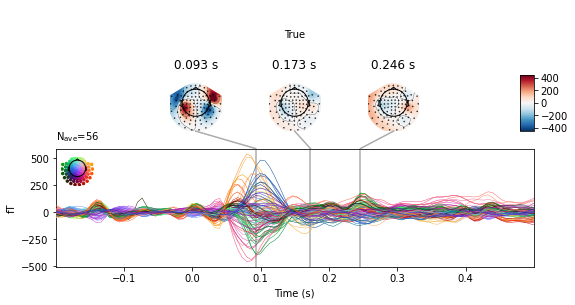

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


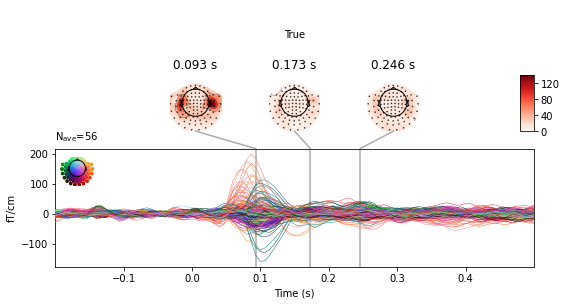

-- number of adjacent vertices : 1284


c:\Users\Lukas\Documents\projects\laura\dev\..\laura\laura.py:153: RuntimeWarning: divide by zero encountered in power
  A = -d**-drop_off


Projections have already been applied. Setting proj attribute to True.


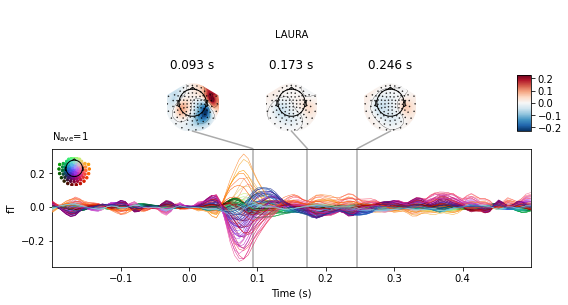

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


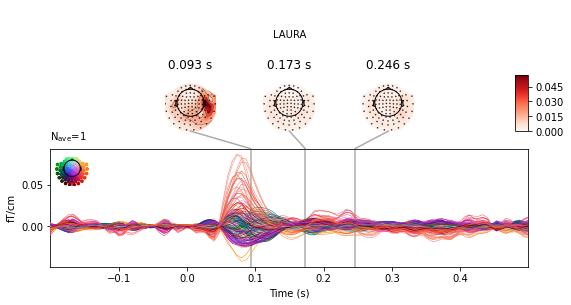

[<Figure size 576x302.4 with 7 Axes>, <Figure size 576x302.4 with 7 Axes>]

Using control points [3.16023491e-13 3.74485054e-13 8.30677708e-13]


  File "c:\Users\Lukas\Envs\esienv\lib\site-packages\mne\viz\_brain\_brain.py", line 1348, in _on_button_release
    self.picked_renderer = self.plotter.iren.FindPokedRenderer(x, y)
AttributeError: 'RenderWindowInteractor' object has no attribute 'FindPokedRenderer'


Using control points [4.04974603e-13 5.45469291e-13 1.50687158e-12]
Using control points [3.53399093e-13 4.84428797e-13 9.07272660e-13]


  File "c:\Users\Lukas\Envs\esienv\lib\site-packages\mne\viz\_brain\_brain.py", line 1348, in _on_button_release
    self.picked_renderer = self.plotter.iren.FindPokedRenderer(x, y)
AttributeError: 'RenderWindowInteractor' object has no attribute 'FindPokedRenderer'


Using control points [1.67054294e-13 2.05195382e-13 4.52619462e-13]
Using control points [1.25766646e-13 1.64030675e-13 4.40711732e-13]


In [15]:
evoked.plot_joint(title='True', times=[0.093, 0.173, 0.246])
stc_laura = apply_laura(evoked, fwd_small, noise_cov=None, 
    reg=0.01, loose=0)
stc_laura.plot(**plot_params)
evoked_laura = util.get_eeg_from_source(stc_laura, fwd_small, evoked.info, tmin=-0.2)
evoked_laura.plot_joint(title='LAURA', times=[0.093, 0.173, 0.246])

...using eLORETA

In [ ]:
method = "eLORETA"
snr = 3.
lambda2 = 1. / snr ** 2
# noise_cov = mne.compute_covariance(
#     epochs, tmax=0., method=['shrunk', 'empirical'], rank=None, verbose=False)

inverse_operator = mne.minimum_norm.make_inverse_operator(
    evoked.info, fwd_small, noise_cov, loose='auto', depth=None, fixed=True, 
    verbose=False)
    
stc_elor, residual = mne.minimum_norm.apply_inverse(epochs.average(), inverse_operator, lambda2,
                              method=method, return_residual=True, verbose=False)
brain = np.abs(stc_elor).plot(**plot_params)
brain.add_text(0.1, 0.9, 'eLORETA on auditory data', 'title',
               font_size=14)
# Plot predicted EEG
epochs.load_data()
evoked_elor = util.get_eeg_from_source(stc_elor, fwd_small, epochs.pick_types(meg=True).info, tmin=0.)
evoked_elor.plot()
evoked_elor.plot_joint(title='eLORETA')
